In [1]:
from cm_fun import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_image_as_grayscale_matrix(image_path):
    """
    Loads an image from the specified path, converts it to grayscale, 
    and returns it as a 2D NumPy array.
    
    :param image_path: Path to the image file (JPG, PNG, etc.)
    :return: 2D NumPy array representing the grayscale image
    """
    # Open the image file
    image = Image.open(image_path)
    
    # Convert the image to grayscale
    grayscale_image = image.convert('L')  # 'L' mode is for grayscale
    
    # Convert the grayscale image to a NumPy array
    grayscale_matrix = np.array(grayscale_image)
    
    return grayscale_matrix

In [3]:
def save_matrix_as_jpg(matrix, output_path):
    """
    Saves a NumPy matrix (grayscale or color) as a JPG image.
    
    :param matrix: The 2D or 3D NumPy array representing the image.
    :param output_path: Path where the JPG image will be saved.
    """
    # Convert the NumPy array back to a Pillow Image
    if len(matrix.shape) == 2:  # Grayscale image (2D array)
        image = Image.fromarray(matrix)
    elif len(matrix.shape) == 3 and matrix.shape[2] == 3:  # RGB image (3D array)
        image = Image.fromarray(matrix, 'RGB')
    else:
        raise ValueError("Unsupported matrix shape. Must be 2D or 3D with 3 channels.")
    
    # Save the image as a JPG file
    image.save(output_path, 'JPEG')
    print(f"Image saved as {output_path}")

In [ ]:
img_matrix = load_image_as_grayscale_matrix('./data/img/0.jpg').astype('float64')
img_matrix

array([[138., 139., 141., ..., 153., 151., 150.],
       [137., 139., 140., ..., 148., 146., 146.],
       [137., 138., 139., ..., 145., 143., 143.],
       ...,
       [ 35.,  37.,  39., ...,  22.,  22.,  21.],
       [ 36.,  37.,  39., ...,  23.,  22.,  21.],
       [ 36.,  37.,  39., ...,  23.,  22.,  21.]], shape=(735, 735))

In [ ]:
for i in [1,2,3,5,10,20,35,50,100]:
    start(img_matrix, i, f'img_{i}k')

img_1k | it=0 | 0.005s | obj=49989.03959326206 | U_norm=3214.7752325799356 | V_norm=15.814786859965748 |
img_1k | it=0 | 0.009s | obj=31619.051573586607 | U_norm=3214.7752325799356 | V_norm=19.878762776764503 |
img_1k | it=1 | 0.009s | obj=31251.039452912897 | U_norm=3223.868774977054 | V_norm=19.878762776764503 |
img_1k | it=1 | 0.007s | obj=31221.417629480296 | U_norm=3223.868774977054 | V_norm=19.883240707848845 |
img_1k | it=2 | 0.006s | obj=31218.206365566653 | U_norm=3223.9474341341293 | V_norm=19.883240707848845 |
img_1k | it=2 | 0.008s | obj=31217.839232909937 | U_norm=3223.9474341341293 | V_norm=19.883296165916146 |
img_1k | it=3 | 0.004s | obj=31217.796884479 | U_norm=3223.948471364165 | V_norm=19.883296165916146 |
img_1k | it=3 | 0.006s | obj=31217.791991796264 | U_norm=3223.948471364165 | V_norm=19.883296904984658 |
img_1k | it=4 | 0.006s | obj=31217.791426349784 | U_norm=3223.9484852134956 | V_norm=19.883296904984658 |
img_1k | it=4 | 0.006s | obj=31217.791360997082 | U_no

KeyboardInterrupt: 

In [6]:
def show_grayscale_images(matrices, cols=3, names=None):
    """
    Displays multiple NumPy matrices as grayscale images in a grid format.
    
    :param matrices: List of NumPy matrices to display as images.
    :param cols: Number of columns in the grid (default is 3).
    """
    if not names:
        names = [f"Image {i + 1}" for i in range(len(matrices))]
    
    # Calculate the number of rows needed based on the number of images
    rows = (len(matrices) + cols - 1) // cols  # This ensures we have enough rows
    
    # Create a figure with the specified number of rows and columns
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    
    # Flatten axes array for easy indexing, in case of multiple rows
    axes = axes.flatten()
    
    # Display each matrix as a grayscale image
    for i, matrix in enumerate(matrices):
        axes[i].imshow(matrix, cmap='gray', vmin=0, vmax=255)
        axes[i].axis('off')  # Hide axes for better visualization
        axes[i].set_title(names[i])
    
    # Hide empty subplots (if any)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

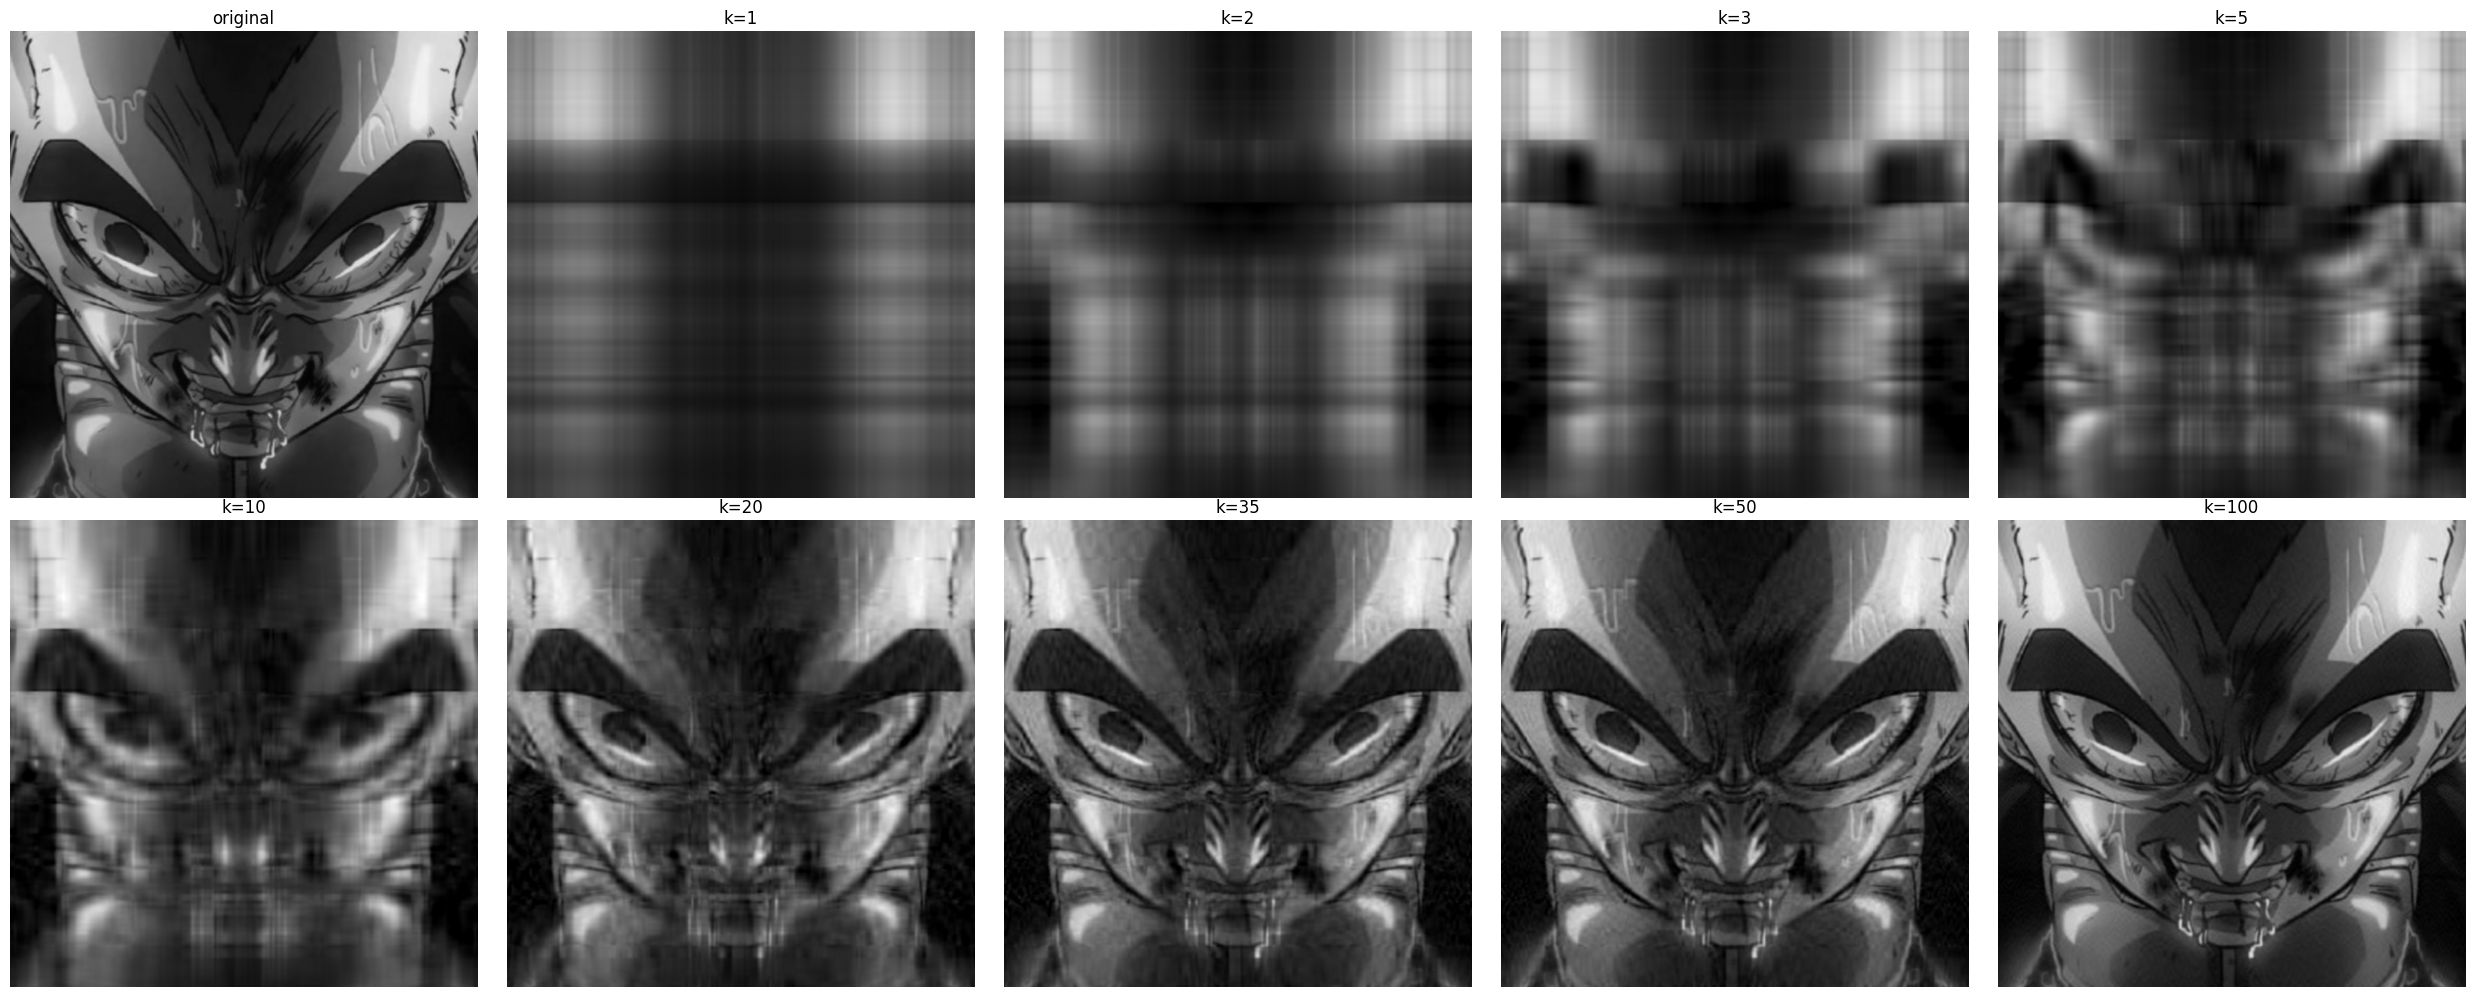

In [ ]:
listona = [img_matrix]
for x in [1,2,3,5,10,20,35,50,100]:
    U = np.load(f'./data/test/img_{x}k/U.npy')
    V = np.load(f'./data/test/img_{x}k/V.npy')
    listona.append(np.dot(U, np.transpose(V)))
    
    
show_grayscale_images(listona, 5, ['original'] + [f'k={i}' for i in [1,2,3,5,10,20,35,50,100]])

### TEST DA FARE:
- Random varie grandezze
- Low rank matrices
- autovalori molto distanti in modulo
- Foto o dati reali
- Esempi convergenza difficile ?!?

### COSE DA VARIARE:
- k
- n,m

In [9]:
x = np.random.rand(20, 1)
x

array([[0.18472239],
       [0.09764464],
       [0.84330005],
       [0.74887825],
       [0.73937894],
       [0.55316988],
       [0.16418021],
       [0.96577349],
       [0.29964411],
       [0.43741758],
       [0.90558927],
       [0.65711958],
       [0.43242376],
       [0.20953671],
       [0.8711508 ],
       [0.75824334],
       [0.36956984],
       [0.1036733 ],
       [0.90965056],
       [0.68846706]])

In [10]:
y = np.random.rand(1,30)
y

array([[0.99237119, 0.2364292 , 0.16460218, 0.33897796, 0.63975906,
        0.97798022, 0.11264332, 0.29084117, 0.61761983, 0.83575391,
        0.32155889, 0.17690512, 0.73760944, 0.42757672, 0.48682236,
        0.89067823, 0.76166197, 0.43666227, 0.98432581, 0.48407811,
        0.32024365, 0.06117691, 0.85674251, 0.42177458, 0.32329202,
        0.63845858, 0.2561382 , 0.51824406, 0.95600737, 0.17760754]])

In [ ]:
A = np.dot(x,y)
start(A, 1, 'low_rank_matrix')

low_rank_matrix | it=0 | 0.0 | obj=4.74934287163599 | U_norm=2.2184114181651635 | V_norm=3.411341037540689 |
low_rank_matrix | it=0 | 0.0 | obj=2.8715637002669058e-15 | U_norm=2.2184114181651635 | V_norm=4.0274801055787925 |
low_rank_matrix | it=1 | 0.0 | obj=3.80497526999749e-15 | U_norm=2.218411418165165 | V_norm=4.0274801055787925 |
low_rank_matrix | it=1 | 0.0010006427764892578 | obj=1.462380121416154e-15 | U_norm=2.218411418165165 | V_norm=4.027480105578791 |
low_rank_matrix | it=2 | 0.0 | obj=1.705712232100476e-15 | U_norm=2.218411418165165 | V_norm=4.027480105578791 |
low_rank_matrix | it=2 | 0.0 | obj=1.7996892860877642e-15 | U_norm=2.218411418165165 | V_norm=4.027480105578791 |
low_rank_matrix | it=3 | 0.0005052089691162109 | obj=2.0923634553129314e-15 | U_norm=2.218411418165165 | V_norm=4.027480105578791 |
low_rank_matrix | it=3 | 0.0 | obj=2.4794648473311342e-15 | U_norm=2.218411418165165 | V_norm=4.02748010557879 |
low_rank_matrix | it=4 | 0.0 | obj=2.1003477453248864e-15 |

In [12]:
np.load('./data/test/low_rank_matrix/U.npy')

array([[0.14558263],
       [0.07695528],
       [0.6646181 ],
       [0.59020279],
       [0.58271624],
       [0.43596193],
       [0.12939302],
       [0.76114136],
       [0.23615426],
       [0.34473571],
       [0.71370922],
       [0.51788633],
       [0.3408    ],
       [0.16513919],
       [0.68656772],
       [0.59758357],
       [0.29126384],
       [0.08170656],
       [0.71690999],
       [0.54259178]])

In [13]:
np.load('./data/test/low_rank_matrix/V.npy')

array([[1.25916924],
       [0.29999296],
       [0.20885532],
       [0.43011186],
       [0.81175768],
       [1.24090927],
       [0.14292737],
       [0.36903354],
       [0.78366633],
       [1.06044555],
       [0.40800969],
       [0.22446589],
       [0.93591503],
       [0.54253031],
       [0.61770409],
       [1.13013623],
       [0.96643407],
       [0.5540585 ],
       [1.24896087],
       [0.61422205],
       [0.40634085],
       [0.07762426],
       [1.08707692],
       [0.53516827],
       [0.41020877],
       [0.81010756],
       [0.32500071],
       [0.65757349],
       [1.21302904],
       [0.22535715]])